In [2]:
import pandas as pd

In [4]:
data = pd.read_excel("student.xlsx")

In [5]:
data.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    34 non-null     object
 2   class   34 non-null     object
 3   mark    35 non-null     int64 
 4   gender  33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [7]:
data.describe()

,id,mark
count,35.000000,35.000000
mean,18.000000,74.657143
std,10.246951,16.401117
min,1.000000,18.000000
25%,9.500000,62.500000
50%,18.000000,79.000000
75%,26.500000,88.000000
max,35.000000,96.000000


In [9]:
data["name"]

0        John Deo
1        Max Ruin
2          Arnold
3      Krish Star
4       John Mike
5       Alex John
6     My John Rob
7          Asruid
8         Tes Qry
9        Big John
10         Ronald
11          Recky
12            Kty
13           Bigy
14       Tade Row
15          Gimmy
16          Tumyu
17          Honny
18          Tinny
19         Jackly
20     Babby John
21         Reggid
22          Herod
23      Tiddy Now
24       Giff Tow
25         Crelea
26            NaN
27      Rojj Base
28    Tess Played
29      Reppy Red
30    Marry Toeey
31      Binn Rott
32      Kenn Rein
33       Gain Toe
34     Rows Noump
Name: name, dtype: object

In [12]:
data[["name", "mark"]]

,name,mark
0,John Deo,75
1,Max Ruin,85
2,Arnold,55
3,Krish Star,60
4,John Mike,60
5,Alex John,55
6,My John Rob,78
7,Asruid,85
8,Tes Qry,78
9,Big John,55


In [13]:
data[:3]

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male


In [14]:
data[data["class"]=="Four"]

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female
5,6,Alex John,Four,55,male
9,10,Big John,Four,55,female
15,16,Gimmy,Four,88,male
20,21,Babby John,Four,69,female
30,31,Marry Toeey,Four,88,male


In [15]:
data['passed'] = data["mark"] >= 60

In [16]:
data.head()

,id,name,class,mark,gender,passed
0,1,John Deo,Four,75,female,True
1,2,Max Ruin,Three,85,male,True
2,3,Arnold,Three,55,male,False
3,4,Krish Star,Four,60,female,True
4,5,John Mike,Four,60,female,True


In [20]:
data = data.rename(columns={"mark":"score"})

In [21]:
data.head()

,id,name,class,score,gender,passed
0,1,John Deo,Four,75,female,True
1,2,Max Ruin,Three,85,male,True
2,3,Arnold,Three,55,male,False
3,4,Krish Star,Four,60,female,True
4,5,John Mike,Four,60,female,True


In [23]:
data.drop("passed", axis=1, inplace=True)

In [24]:
data.head()

,id,name,class,score,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [27]:
grouped_data = data.groupby('class')

In [28]:
grouped_data['score'].mean()

class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     68.750000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: score, dtype: float64

In [31]:
data.groupby('class')['id'].count()

class
Eight     1
Fifth     1
Five      2
Four      8
Nine      2
Seven    10
Six       7
Three     3
Name: id, dtype: int64

In [32]:
data.groupby('gender')['score'].mean()

gender
female    77.312500
male      71.588235
Name: score, dtype: float64

In [33]:
data.pivot_table(index='class',columns='gender', values='score')

gender,female,male
class,,
Eight,NaN,79.0
Fifth,NaN,78.0
Five,NaN,80.0
Four,63.8,77.0
Nine,65.0,18.0
Seven,81.4,73.8
Six,89.2,54.0
Three,NaN,70.0


In [37]:
import numpy as np

In [38]:
# List of conditions (evaluated in order)
conditions = [
    data['score'] >= 85,
    data['score'] >= 70, 
    data['score'] >= 60  
]
# List of corresponding values for each condition
choices = ['A', 'B', 'C']
data['grade'] = np.select(conditions, choices, default='D')

In [39]:
data.head()

,id,name,class,score,gender,grade
0,1,John Deo,Four,75,female,B
1,2,Max Ruin,Three,85,male,A
2,3,Arnold,Three,55,male,D
3,4,Krish Star,Four,60,female,C
4,5,John Mike,Four,60,female,C


In [40]:
data.sort_values(by='score', ascending=False)

,id,name,class,score,gender,grade
32,33,Kenn Rein,Six,96,female,A
11,12,Recky,Six,94,female,A
31,32,Binn Rott,Seven,90,female,A
10,11,Ronald,Six,89,female,A
24,25,Giff Tow,Seven,88,male,A
15,16,Gimmy,Four,88,male,A
14,15,Tade Row,NaN,88,male,A
13,14,Bigy,Seven,88,female,A
12,13,Kty,Seven,88,female,A
34,35,Rows Noump,Six,88,female,A


In [41]:
data.to_csv("student_complet.csv")

Data ready for visualization:
   id        name  class  score  gender grade
0   1    John Deo   Four     75  female     B
1   2    Max Ruin  Three     85    male     A
2   3      Arnold  Three     55    male     D
3   4  Krish Star   Four     60  female     C
4   5   John Mike   Four     60  female     C

Generating plots...


C:\Users\Johann\AppData\Local\miniconda3\envs\Formation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: '<' not supported between instances of 'float' and 'str'

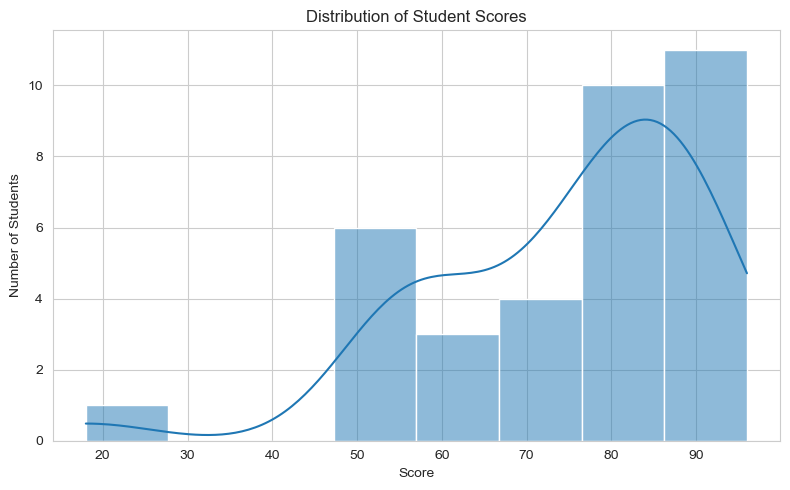

<Figure size 800x500 with 0 Axes>

In [42]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt # For displaying and customizing plots
import seaborn as sns          # For creating statistical plots
%matplotlib inline
# --- Step 1: Load or Create your Data ---
# Using the sample data from the previous steps

# Add the 'grade' column
conditions = [
    data['score'] >= 85,
    data['score'] >= 70,
    data['score'] >= 60
]
choices = ['A', 'B', 'C']
data['grade'] = np.select(conditions, choices, default='D')

print("Data ready for visualization:")
print(data.head()) # Print first few rows to confirm
print("\nGenerating plots...")

# --- Step 2: Create Visualizations ---

# Set a nice style for the plots
sns.set_style("whitegrid")

# Plot 1: Distribution of Scores (Histogram + KDE)
# Shows the frequency of different score ranges.
plt.figure(figsize=(8, 5)) # Create a new figure window with a specific size
sns.histplot(data=data, x='score', kde=True, bins=8) # kde=True adds a smooth density line
plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.tight_layout() # Adjust layout
#plt.show() # Display the plot

# Plot 2: Scores by Class (Box Plot)
# Compares the distribution of scores (median, quartiles, outliers) across classes.
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='class', y='score', palette='viridis', order=sorted(data['class'].unique())) # Order classes alphabetically
plt.title('Comparison of Scores by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.tight_layout()
#plt.show()

# Plot 3: Count of Students per Grade (Count Plot / Bar Chart)
# Shows how many students received each grade.
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='grade', palette='magma', order=['A', 'B', 'C', 'D']) # Specify order for grades
plt.title('Number of Students per Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.tight_layout()
#plt.show()

# Plot 4: Scores by Class and Gender (Box Plot with Hue)
# Compares score distributions across classes, further broken down by gender.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='class', y='score', hue='gender', palette='coolwarm', order=sorted(data['class'].unique()))
plt.title('Scores by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(title='Gender') # Add a legend for the hue
plt.tight_layout()
#plt.show()

# Plot 5: Score Distribution by Gender (Violin Plot)
# Shows score distribution density for each gender. Combines boxplot and KDE.
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x='gender', y='score', palette='pastel')
plt.title('Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.tight_layout()
#plt.show()

print("\nFinished generating plots.")